In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [1]:
import tensorflow as tf
import tensorflow_probability as tfp

tfk = tf.keras
tfkl = tf.keras.layers
tfd = tfp.distributions
tfpl = tfp.layers

2024-06-06 16:08:56.321376: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
kernel = tfp.math.psd_kernels.ExponentiatedQuadratic()
xs = np.linspace(-5, 5, 200).reshape([-1, 1])
gp = tfd.GaussianProcess(kernel, index_points=xs)
print("Batch shape:", gp.batch_shape)
print("Event shape:", gp.event_shape)

Instructions for updating:
`always_yield_multivariate_normal` is deprecated. After 2023-02-15, this arg will be ignored, and behavior will be as though `always_yield_multivariate_normal=True`. This means that a`GaussianProcessRegressionModel` evaluated at a single index point will have event shape `[1]`. To reproduce the behavior of `always_yield_multivariate_normal=False` squeeze the rightmost singleton dimension from the output of `mean`, `sample`, etc.


Instructions for updating:
`always_yield_multivariate_normal` is deprecated. After 2023-02-15, this arg will be ignored, and behavior will be as though `always_yield_multivariate_normal=True`. This means that a`GaussianProcessRegressionModel` evaluated at a single index point will have event shape `[1]`. To reproduce the behavior of `always_yield_multivariate_normal=False` squeeze the rightmost singleton dimension from the output of `mean`, `sample`, etc.


Batch shape: ()
Event shape: (200,)


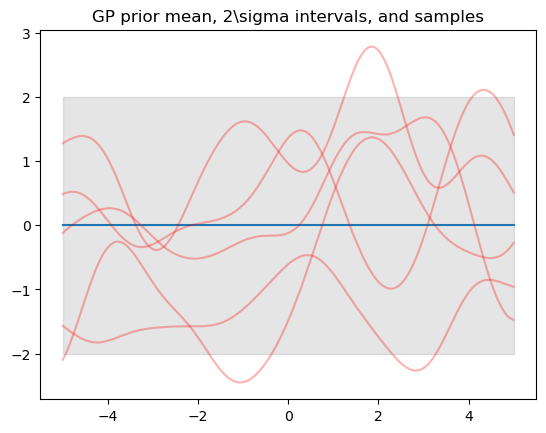

In [14]:
upper, lower = gp.mean() + [2 * gp.stddev(), -2 * gp.stddev()]
plt.plot(xs, gp.mean())
plt.fill_between(xs[..., 0], upper, lower, color='k', alpha=0.1)
for _ in range(5):
    plt.plot(xs, gp.sample(), c='r', alpha=.3)
plt.title(r"GP prior mean, 2\sigma intervals, and samples")
plt.show()

In [19]:
dir(gp)

['_Distribution__cached_batch_shape',
 '_TF_MODULE_IGNORED_PROPERTIES',
 '__abstractmethods__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_allow_nan_stats',
 '_always_yield_multivariate_normal',
 '_batch_shape',
 '_batch_shape_tensor',
 '_broadcast_parameters_with_batch_shape',
 '_call_cdf',
 '_call_log_cdf',
 '_call_log_prob',
 '_call_log_survival_function',
 '_call_prob',
 '_call_quantile',
 '_call_sample_and_log_prob',
 '_call_sample_n',
 '_call_survival_function',
 '_call_unnormalized_log_prob',
 '_checkpoint_dependencies',
 '_chol

# Bijectors

Rational Quadratic splines are already implemented!!!
[doc page](https://www.tensorflow.org/probability/api_docs/python/tfp/bijectors/RationalQuadraticSpline?_gl=1*hok02a*_up*MQ..*_ga*Mzc3Mzc0MTMyLjE3MTc2ODcxOTk.*_ga_W0YLR4190T*MTcxNzY4NzE5OS4xLjAuMTcxNzY4NzE5OS4wLjAuMA..)


In [18]:
dir(normal_cdf)

['_TF_MODULE_IGNORED_PROPERTIES',
 '__abstractmethods__',
 '__call__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__iter__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__tf_tracing_type__',
 '__weakref__',
 '_abc_impl',
 '_add_trackable_child',
 '_add_variable_with_custom_getter',
 '_assertions',
 '_batch_shape',
 '_batch_shape_tensor',
 '_broadcast_parameters_with_batch_shape',
 '_cache',
 '_cached_batch_shapes',
 '_call_forward',
 '_call_forward_log_det_jacobian',
 '_call_inverse',
 '_call_inverse_log_det_jacobian',
 '_call_is_increasing',
 '_checkpoint_dependencies',
 '_composite_tensor_nonshape_params',
 '_composite_tensor_params',
 '_composite_tensor_shape_params',
 '_constructor_name_scope',
 '_co

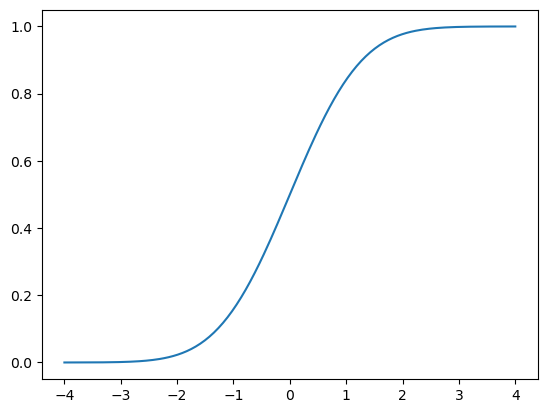

In [16]:
normal_cdf = tfp.bijectors.NormalCDF()
xs = np.linspace(-4., 4., 200)
plt.plot(xs, normal_cdf.forward(xs))
plt.show()

# MCMC

In [21]:
def f(x,w):
    x = tf.pad(x, [[1,0], [0, 0]], constant_values=1)
    linop = tf.linalg.LinearOperatorFullMatrix(w[...,np.newaxis])
    result = linop.matmul(x, adjoint=True)
    return result[..., 0, :]

num_features = 2
num_examples = 50
noise_scale = .5
true_w = np.array([-1, 2, 3.])

xs = np.random.uniform(-1., 1., [num_features, num_examples])
ys = f(xs, true_w) + np.random.normal(0., noise_scale, size=num_examples)

The function [`f(x, w)`](command:_github.copilot.openSymbolFromReferences?%5B%7B%22%24mid%22%3A1%2C%22fsPath%22%3A%22%2Fstore%2FDPMMS%2Fww347%2FML_reproductions%2Fnotebooks%2Ftutorials%2FTour_of_TensorFlow_Probability.ipynb%22%2C%22path%22%3A%22%2Fstore%2FDPMMS%2Fww347%2FML_reproductions%2Fnotebooks%2Ftutorials%2FTour_of_TensorFlow_Probability.ipynb%22%2C%22scheme%22%3A%22vscode-notebook-cell%22%2C%22fragment%22%3A%22X25sZmlsZQ%3D%3D%22%7D%2C%7B%22line%22%3A0%2C%22character%22%3A4%7D%5D "/store/DPMMS/ww347/ML_reproductions/notebooks/tutorials/Tour_of_TensorFlow_Probability.ipynb") is a custom function defined in the TensorFlow Probability tour tutorial. Let's break down the code and understand what it does:



In [ ]:
def f(x, w):
    x = tf.pad(x, [[1, 0], [0, 0]], constant_values=1)
    linop = tf.linalg.LinearOperatorFullMatrix(w[..., np.newaxis])
    result = linop.matmul(x, adjoint=True)
    return result[..., 0, :]

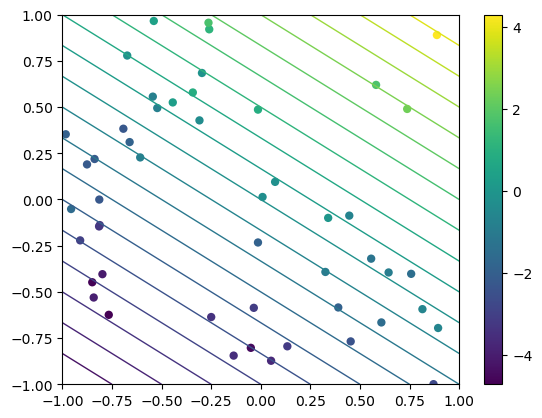

In [23]:
plt.scatter(*xs, c=ys, linewidths=0)

grid = np.meshgrid(*[np.linspace(-1, 1, 100)] * 2)
xs_grid = np.stack(grid, axis=0)
fs_grid = f(xs_grid.reshape([num_features, -1]), true_w)
fs_grid = np.reshape(fs_grid, [100, 100])
plt.colorbar()
plt.contour(xs_grid[0, ...], xs_grid[1, ...], fs_grid, 20, linewidths=1)
plt.show()